In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Check the description and total Null count of the Titanic DataFrame

In [2]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('./Data/train.csv')

# titanic_df.describe()
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Filling the Null columns by characteristics

In [3]:
def prepare_df_chk(df: pandas.DataFrame):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Cabin'] = df['Cabin'].str[:1]
    return df


titanic_df = prepare_df_chk(titanic_df)
# test_titanic_df = prepare_df(test_titanic_df)

# sns.barplot(x='Sex', y='Survived', data=titanic_df)
# sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


# Categorizing age to check the surviving people by age

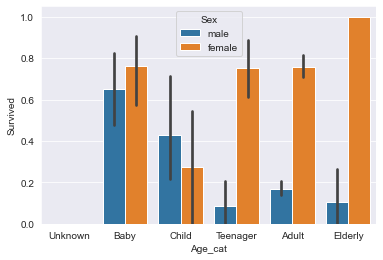

In [4]:
# categorization by age
def get_category(age):
    cat = ''
    if age <= -1:
        cat = 'Unknown'
    elif age <= 5:
        cat = 'Baby'
    elif age <= 12:
        cat = 'Child'
    elif age <= 18:
        cat = 'Teenager'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'

    return cat

# X-axos ordering
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

#  Preprocessing DataSet that observed above

In [6]:
from sklearn.preprocessing import LabelEncoder


# Filling Null Parameters
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df


# remove non-meaningful columns
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


# Label Encoding
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


# preprocessing
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# reloading original dataset to get feature and label dataset separately
titanic_df = pd.read_csv('./Data/train.csv')
test_titanic_df = pd.read_csv('./Data/test.csv')

X_train_df = transform_features(titanic_df)

X_test = transform_features(test_titanic_df)
X_train = X_train_df.drop('Survived', axis=1)
Y_train = X_train_df['Survived']

X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,7,1
1,3,0,47.00000,1,0,7.0000,7,2
2,2,1,62.00000,0,0,9.6875,7,1
3,3,1,27.00000,0,0,8.6625,7,2
4,3,0,22.00000,1,1,12.2875,7,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,7,2
414,1,0,39.00000,0,0,108.9000,2,0
415,3,1,38.50000,0,0,7.2500,7,2
416,3,1,30.27259,0,0,8.0500,7,2


# Training DataSet by Decision Tree, Random Forest, Logistic Regression to get the best accuracy

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# create DecisionTree, RandomForest, LogisticRegression Classifier
dt_clf = DecisionTreeClassifier(random_state=20)
rf_clf = RandomForestClassifier(random_state=20, n_estimators=70)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier learn/predict/evaluation
dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier score: {dt_clf.score(X_train, Y_train):.6f}')  # \n{dt_pred}')

# RandomForestClassifier learn/predict/evaluation
rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier score: {rf_clf.score(X_train, Y_train):.6f}')  # \n{rf_pred}')

# LogisticRegression learn/predict/evaluation
lr_clf.fit(X_train, Y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression score: {lr_clf.score(X_train, Y_train):.6f}')  # \n{lr_pred}')

DecisionTreeClassifier score: 0.986532
RandomForestClassifier score: 0.986532
LogisticRegression score: 0.802469


# Submit the result of Random Forest Prediction

In [10]:
# submit RandomForestClassifier
submission = pd.DataFrame({"PassengerId": pd.read_csv('./Data/test.csv')["PassengerId"], "Survived": rf_pred})
submission.to_csv('submission.csv', index=False)